# A brief history of memes.

Doing this on the dankmemes subreddit severly limits the potential of this application. You should remember the crucial point that Data Science is a tool to get key insights from data and using it for other potential gains by utilizing those insights. So we should probably switch the dataset to the frontpage and do the analysis once more. 
* What do people gain from posting on reddit?
* Why would people want to get to the front-page?
* How would these insights help a lurker vs. poster?

This is a dataset consisting of December memes that was posted on the dankmemes subreddit from the 1st of December to the 20th of December. We would try to do some exploratory analysis on this dataset which consists of over 180,000 memes scrapped from the site.

## 1. Imports and Loading

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

sns.set()


In [2]:
data = pd.read_csv('scrapper/db.csv')

/home/isht3/anaconda3/envs/env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (20,61) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1,...,subreddit_subscribers,subreddit_type,suggested_sort,thumbnail,thumbnail_height,thumbnail_width,title,url,whitelist_status,wls
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1514479,public,top,https://b.thumbs.redditmedia.com/x7OD3XG77XcZ8...,100.0,140.0,Oh boi,https://i.redd.it/i1lmxa7gfo121.jpg,all_ads,6
1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1514479,public,top,https://a.thumbs.redditmedia.com/sZR4EtnnktxUc...,86.0,140.0,I just really like apple juice,https://i.redd.it/rougx6rcfo121.jpg,all_ads,6
2,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1514478,public,top,https://b.thumbs.redditmedia.com/62ttDjpt1OA-Q...,105.0,140.0,Sorry Fellas,https://i.redd.it/ppyt4kxcfo121.jpg,all_ads,6
3,3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,1514472,public,top,https://b.thumbs.redditmedia.com/VcOsvGkhsbkrx...,140.0,140.0,This has happened many times,https://i.redd.it/z8r6h176fo121.png,all_ads,6
4,4,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,1514472,public,top,https://b.thumbs.redditmedia.com/B7fsOTITQbv-K...,140.0,140.0,man it hurts to be this hip,https://i.redd.it/9qbdfda5fo121.jpg,all_ads,6


In [4]:
columns_to_be_dropped = ['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1',
                       'Unnamed: 0.1.1.1.1', 'Unnamed: 0.1.1.1.1.1', 'Unnamed: 0.1.1.1.1.1.1',
                       'Unnamed: 0.1.1.1.1.1.1.1', 'Unnamed: 0.1.1.1.1.1.1.1.1',
                       'Unnamed: 0.1.1.1.1.1.1.1.1.1', 'author_flair_background_color', 'author_flair_css_class',
                       'author_flair_richtext', 'author_flair_template_id',
                       'author_flair_text', 'author_flair_text_color', 'author_flair_type',
                       'author_fullname', 'author_patreon_flair', 'can_mod_post',
                       'contest_mode',  'link_flair_background_color', 'link_flair_css_class',
                       'link_flair_richtext', 'link_flair_template_id', 'link_flair_text',
                       'link_flair_text_color', 'link_flair_type','subreddit', 'subreddit_id',
                       'subreddit_subscribers', 'subreddit_type','thumbnail', 'thumbnail_height', 'thumbnail_width',
                       'title', 'url', 'domain', 'is_meta',
                       'is_original_content', 'is_reddit_media_domain', 'is_robot_indexable',
                       'is_self', 'is_video', 'media', 'media_embed', 'media_only',
                       'no_follow', 'whitelist_status', 'wls']

In [5]:
data = data.drop(columns_to_be_dropped, axis=1)

In [6]:
data.head(2)

,author,author_cakeday,created_utc,full_link,gilded,gildings,id,is_crosspostable,locked,num_comments,...,pwls,retrieved_on,score,secure_media,secure_media_embed,selftext,send_replies,spoiler,stickied,suggested_sort
0,darthmemer4,NaN,1543674551,https://www.reddit.com/r/dankmemes/comments/a2...,NaN,"{'gid_1': 0, 'gid_2': 0, 'gid_3': 0}",a23fie,False,False,1,...,6,1543674552,1,NaN,NaN,NaN,False,False,False,top
1,SirDeep,NaN,1543674540,https://www.reddit.com/r/dankmemes/comments/a2...,NaN,"{'gid_1': 0, 'gid_2': 0, 'gid_3': 0}",a23fgk,True,False,4,...,6,1543674541,23,NaN,NaN,NaN,True,False,False,top


## Extracting information.

In [7]:
data = data.set_index('id')

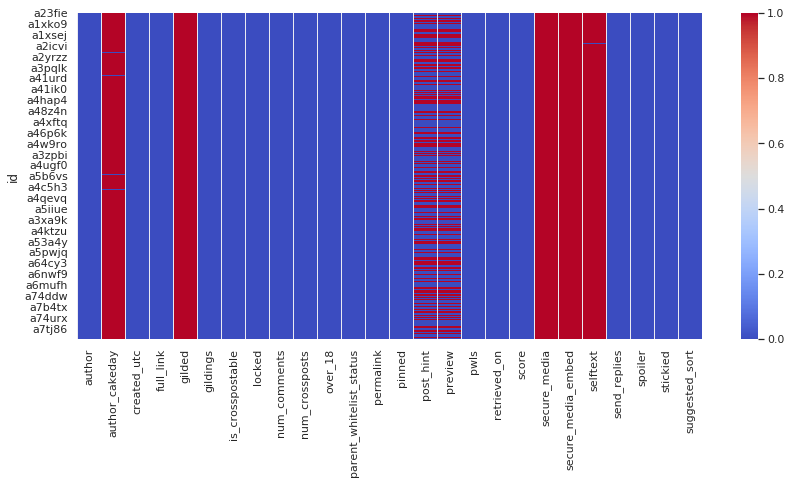

In [8]:
plt.figure(figsize=(14, 6))
sns.heatmap(data.isnull(), cmap='coolwarm')

In [9]:
data = data.drop_duplicates()

In [10]:
data.shape

(97336, 26)

In [11]:
null_columns = data.isnull().any()[data.isnull().any()]

In [12]:
cols = null_columns.index

In [13]:
data = data.drop(columns=cols)

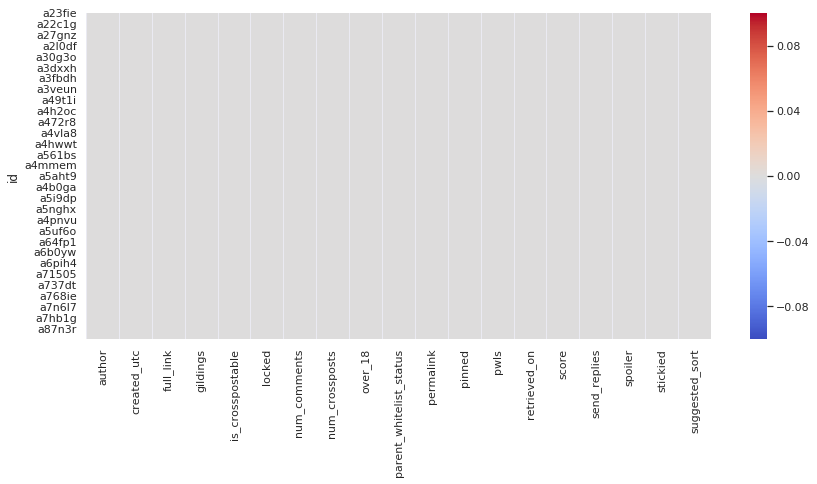

In [14]:
plt.figure(figsize=(14, 6))
sns.heatmap(data.isnull(), cmap='coolwarm')

# Creating Time Series Features.

In [15]:
import calendar
from datetime import datetime

def convert_to_utc(date):
    ts = datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')
    return ts

def get_date(date):
    return date.split(' ')[0]

def get_time(date):
    return date.split(' ')[1]

def get_weekday(date):
    date = datetime.strptime(date, '%Y-%m-%d')
    return calendar.day_name[date.weekday()]

In [16]:
data['created_datetime'] = data['created_utc'].apply(convert_to_utc)

In [17]:
data['created_datetime'].value_counts().head()

2018-12-10 19:31:02    12
2018-12-07 18:35:57    12
2018-12-08 09:47:14    11
2018-12-08 23:48:54    11
2018-12-07 18:10:31    11
Name: created_datetime, dtype: int64

In [18]:
data['created_date'] = data['created_datetime'].apply(get_date)

data['created_time'] = data['created_datetime'].apply(get_time)

In [ ]:
# Create Weekday variable
data['created_weekday'] = data['created_date'].apply(get_weekday)

day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data['created_weekday'] = pd.Categorical(data['created_weekday'], categories = day_labels, 
                                          ordered = True)

In [ ]:
# Hourly Variables

In [ ]:
# Time of day
def get_session(time_list):
    time_list[0] = int(time_list[0])
    if time_list[0] > 4 and time_list[0] < 12:
        return 'Morning'
    elif time_list[0] >= 12 and time_list[0] < 17:
        return 'Afternoon'
    elif time_list[0] >= 17 and time_list[0] < 21:
        return 'Evening'
    else:
        return 'Night'
    
data['temp'] = data['created_time'].str.split(':')
    
data['created_session'] = data['temp'].apply(get_session)

session_labels = ['Morning', 'Afternoon', 'Evening', 'Night']
data['created_session'] = pd.Categorical(data['created_session'], categories = session_labels, 
                                          ordered = True)

In [ ]:
data.created_session.value_counts()

Night        33769
Afternoon    24121
Evening      22209
Morning      17237
Name: created_session, dtype: int64

In [ ]:
def get_hour_of_day(time):
    return time[0]

data['temp'] = data['created_time'].str.split(':')
data['created_hour'] = data['temp'].apply(get_hour_of_day)

In [ ]:
def get_day(date):
    return date[2]

data['temp'] = data['created_date'].str.split('-')
data['created_day'] = data['temp'].apply(get_day)

data = data.drop(data[data['created_day'] == '30'].index, axis=0)

In [ ]:
data['created_day'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21'],
      dtype=object)

# Time Series Visualizations

## 1. Upvotes on Weekdays.

In [ ]:
data['score'].describe()

count    95705.000000
mean       660.583167
std       3362.775129
min          0.000000
25%          1.000000
50%         36.000000
75%         78.000000
max      97836.000000
Name: score, dtype: float64

/home/isht3/anaconda3/envs/env/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


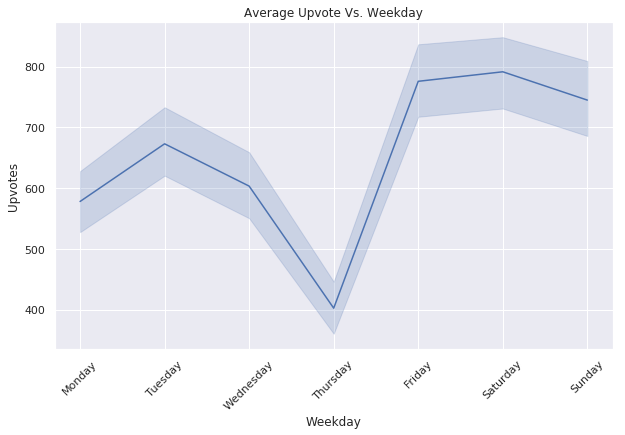

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x=data['created_weekday'], y=data['score'], palette='hus1')
plt.xticks(rotation=45)
ax.set_title("Average Upvote Vs. Weekday")
ax.set_xlabel('Weekday')
ax.set_ylabel('Upvotes')
ax.get_figure().savefig("weekday-upvotes.png")

## 2. Count of memes on Weekdays

### Count of all posts 

In [ ]:
series_count = data.groupby('created_weekday')['author'].count()

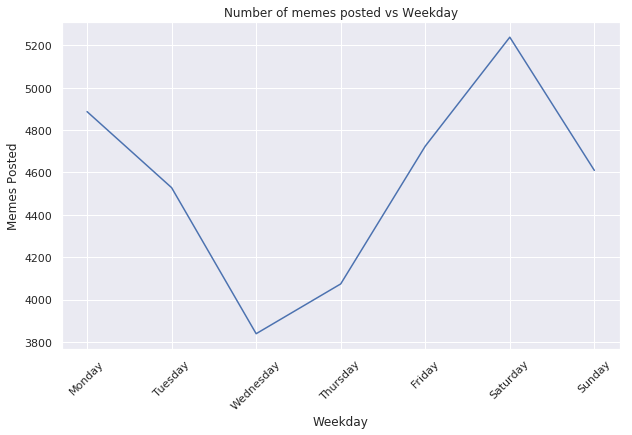

In [ ]:
# Since data for 3 weeks are used.
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x=series_count.index, y=series_count.values/3)
plt.xticks(rotation=45)
ax.set_title("Number of memes posted vs Weekday")
ax.set_xlabel('Weekday')
ax.set_ylabel('Memes Posted')
ax.get_figure().savefig("weekday-score.png")

In [ ]:
data['is_1'] = data['score'].apply(lambda x: 1 if x == 1 else 0)

data['is_greater_than_1000'] = data['score'].apply(lambda x: 1 if x > 1000 else 0)

data['is_greater_than_5000'] = data['score'].apply(lambda x: 1 if x > 5000 else 0)

data['is_greater_than_500'] = data['score'].apply(lambda x: 1 if x > 500 else 0)

data['is_lesser_than_1000'] = data['score'].apply(lambda x: 1 if x < 1000 else 0)

data['is_1'] = data['score'].apply(lambda x: 1 if x == 1 else 0)

### Count of all posts that got above 1000 upvotes given a Weekday

Text(0, 0.5, 'Memes Posted')

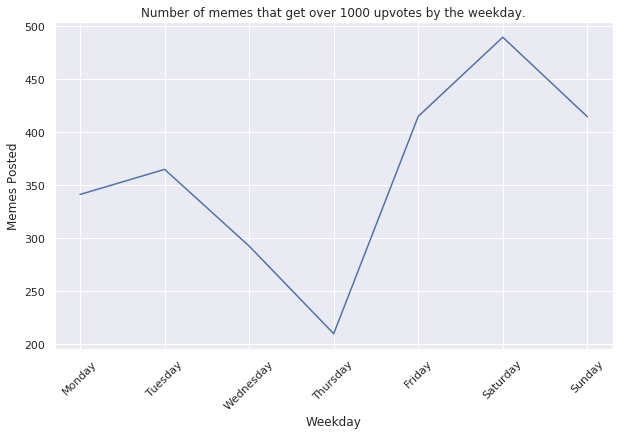

In [ ]:
series_count = data[data['is_greater_than_1000'] == 1].groupby('created_weekday')['author'].count()
# Since data for 3 weeks are used.
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x=series_count.index, y=series_count.values/3)
plt.xticks(rotation=45)
ax.set_title("Number of memes that get over 1000 upvotes by the weekday.")
ax.set_xlabel('Weekday')
ax.set_ylabel('Memes Posted')

## 3. Distributions

### Distribution of Upvote counts

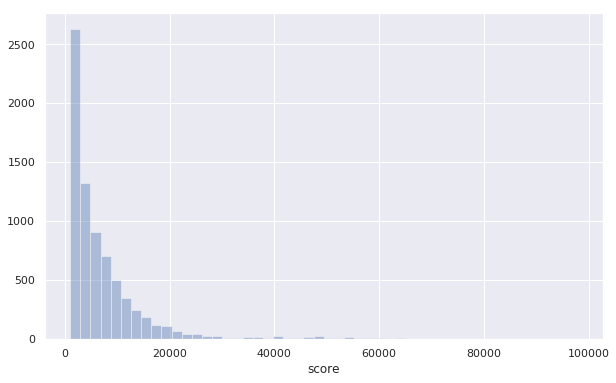

In [ ]:
plt.figure(figsize=(10, 6))

sns.distplot(data[data['score'] > 1000].score, kde=False)
# High skew and kurtosis

In [ ]:
data['num_comments'].describe()

count    95705.000000
mean        10.974693
std         35.587720
min          0.000000
25%          2.000000
50%          3.000000
75%          8.000000
max       1285.000000
Name: num_comments, dtype: float64

In [ ]:
data[data['score'] > 1000]['author'].count()

7578

In [ ]:
data[data['score'] <= 1000]['author'].count()

88127

## 4. BarPlots

### Barplots showing counts of posts with greater than 1000 upvotes

In [ ]:
data['is_greater_than_1000'].value_counts()
data['is_greater_than_1000'] = data['is_greater_than_1000'].apply(lambda x: "Over 1000 Upvotes" if x else "Less than 1000")

In [ ]:
df_plot = data.groupby(['is_greater_than_1000', 'is_1']).size().reset_index().pivot(columns='is_greater_than_1000', index='is_1', values=0)

In [ ]:
df_plot.iloc[1, 1] = 0

df_plot

is_greater_than_1000,Less than 1000,Over 1000 Upvotes
is_1,,
0,60468.0,7578.0
1,27659.0,0.0


In [ ]:
df_plot = df_plot.reset_index()

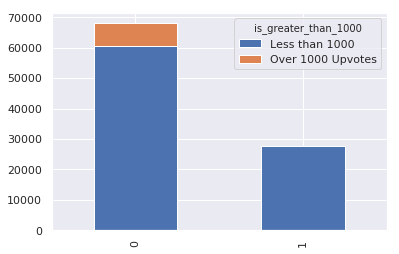

In [ ]:
df_plot.iloc[:, 1:].plot(kind='bar', stacked=True)

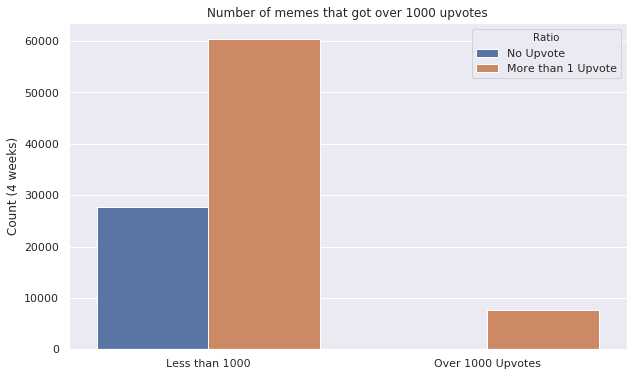

In [ ]:
plt.figure(figsize=(10, 6))

data['Ratio'] = data['is_1'].apply(lambda x: "No Upvote" if x else "More than 1 Upvote")

ax = sns.countplot(x='is_greater_than_1000', data=data, hue='Ratio')
ax.set_title("Number of memes that got over 1000 upvotes")
ax.set_xlabel('')
ax.set_ylabel('Count')
ax.set(ylabel='Count (4 weeks)')
plt.show()
ax.get_figure().savefig("barplot.png")

## 5. Time of Day Analysis (Post Count)

### Average Post count given time of day

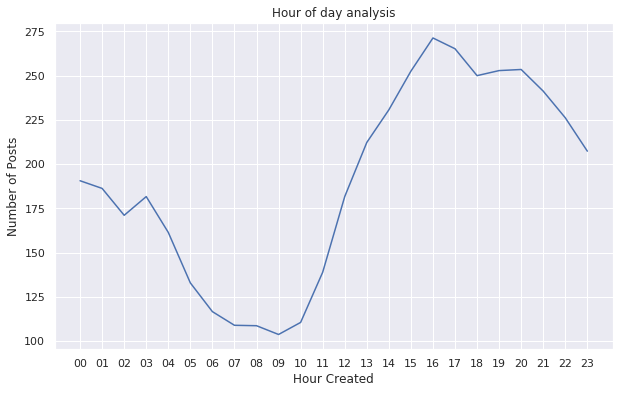

In [ ]:
plt.figure(figsize=(10, 6))
count_by_hour = data.groupby('created_hour').count()['author']
ax = sns.lineplot(x=count_by_hour.index, y=count_by_hour.values/21)
# plt.xticks(rotation=45)
ax.set_title("Hour of day analysis")
ax.set_xlabel('Hour Created')
ax.set_ylabel('Number of Posts')
ax.get_figure().savefig("day-count.png")

### Average Post count given time of day (Weekend)

Text(0, 0.5, 'Meme Count')

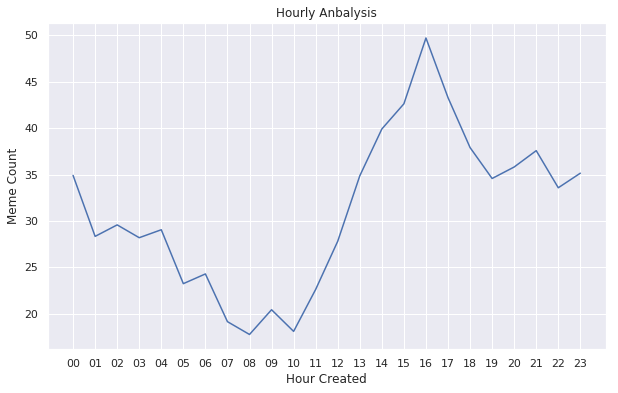

In [ ]:
plt.figure(figsize=(10, 6))
count_by_hour = data[data['created_weekday'] == ['Saturday']].groupby('created_hour').count()['author']
ax = sns.lineplot(x=count_by_hour.index, y=count_by_hour.values/21)
# plt.xticks(rotation=45)
ax.set_title("Hourly Anbalysis")
ax.set_xlabel('Hour Created')
ax.set_ylabel('Meme Count')

### Average Post count that got over 1000 upvotes

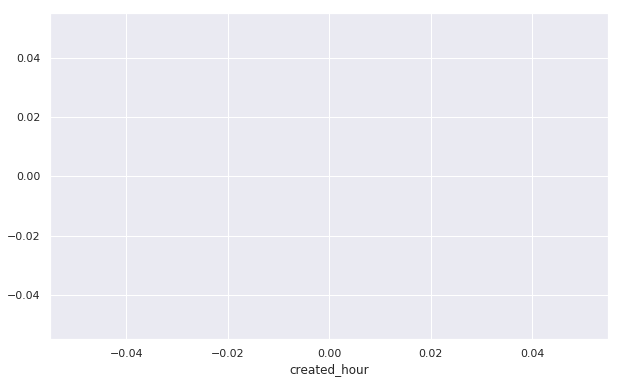

In [ ]:
plt.figure(figsize=(10, 6))

count_by_hour = data[data['is_greater_than_1000']==1].groupby('created_hour').count()['author']
sns.lineplot(x=count_by_hour.index, y=count_by_hour.values/21)

In [ ]:
over_500 = data[data['is_greater_than_500'] == 1]

## 6. Time of Day Analysis (Upvote Count)

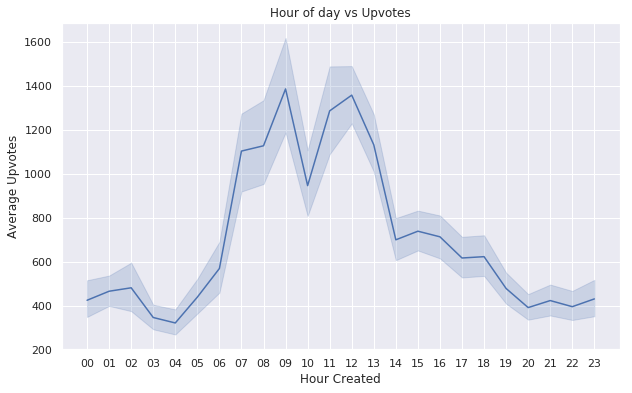

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x='created_hour', y='score', data=data)
ax.set_title("Hour of day vs Upvotes")
ax.set_xlabel('Hour Created')
ax.set_ylabel('Average Upvotes')
ax.get_figure().savefig("day-score.png")

## 7. Session of day analysis.

### Session Upvotes

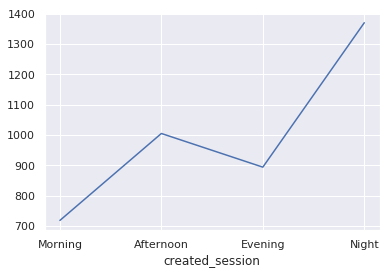

In [ ]:
count_by_hour = data.groupby('created_session').count()['author']
sns.lineplot(x=count_by_hour.index, y=count_by_hour.values/24)

### Session Score

Something to update the blog with: Even though we may think posting during the peak time would give us karma it's does not, because the amount of memes posted is so high that there is a very good chance yours would get lost among the other. Counterintuitively, it's the opposite that is easy and works effectively. The demand for posts exists and you can fill it by posting in the down hours which is given above.

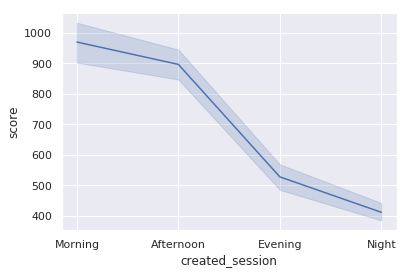

In [ ]:
sns.lineplot(x='created_session', y='score', data=data)

## 8. Day analysis

In [ ]:
plt.figure(figsize=(14, 6))
sns.lineplot(x=data['created_day'], y=data['score'])